In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline


Read the csv file using pandas library.Pandas library is used for data manipulation and also helps for analysis.Using pandas we can clean the data,preprocess the data and also it helps for visualization .

In [ ]:
#read the csv file
data=pd.read_csv("/content/bank.csv",sep=';')

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

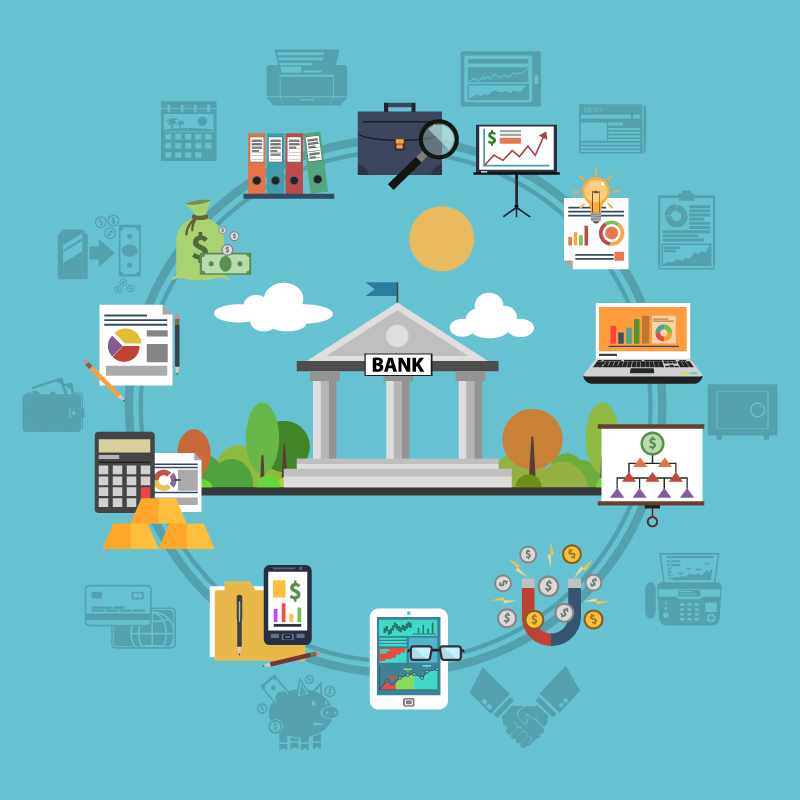

 **Dataset Description **

---
**1.age -Age of the person** (numeric)

***2.job : type of job*** (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")

**3.marital : marital status ***(categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

***4 .education-education level ***(categorical: "unknown","secondary","primary","tertiary")

***5 .default: has credit in default?*** (binary: "yes","no")

***6.balance: average yearly balance, in euros ***(numeric)

***7 .housing: has housing loan?*** (binary: "yes","no")

***8.loan: has personal loan? ***(binary: "yes","no")
   
***9.contact: contact communication type ***(categorical: "unknown","telephone","cellular")

***10 .day: last contact day of the month*** (numeric)

***11 .month: last contact month of year*** (categorical: "jan", "feb", "mar", ..., "nov", "dec")

***12.duration: last contact duration, in seconds*** (numeric)
  
  ***13 .campaign: number of contacts performed during this campaign and for this client ***(numeric, includes last contact)

  ***14 .pdays: number of days that passed by after the client was last contacted from a previous campaign ***(numeric, -1 means client was not previously contacted)

  ***15.previous: number of contacts performed before this campaign and for this client*** (numeric)
  
  ***16.poutcome: outcome of the previous marketing campaign*** (categorical: "unknown","other","failure","success")

In [ ]:
print(data)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [ ]:
#view first 10 data in the dataset
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [ ]:
#view last 10 data in the dataset
data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4511,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes
4512,40,blue-collar,married,secondary,no,1100,yes,no,unknown,29,may,660,2,-1,0,unknown,no
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [ ]:
#datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
#summary
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
#rows and columns
data.shape

(4521, 17)

In [ ]:
#unique_values
data.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [ ]:
#check the missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: >

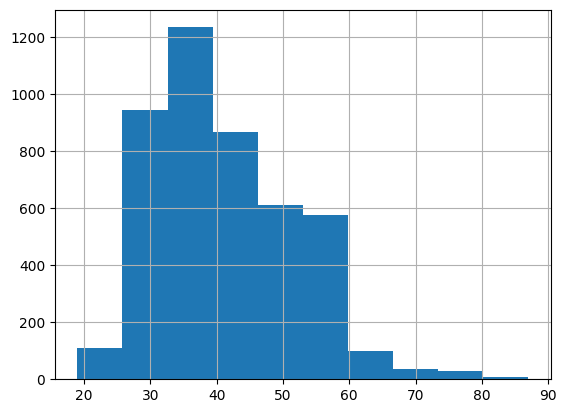

In [ ]:
#univariate analysis
#Distribution of Age
data['age'].hist()

**More account holders are between the age of 30 to 40 and less 10% of account holders are between the age of 80 to 90 **

<Axes: xlabel='job'>

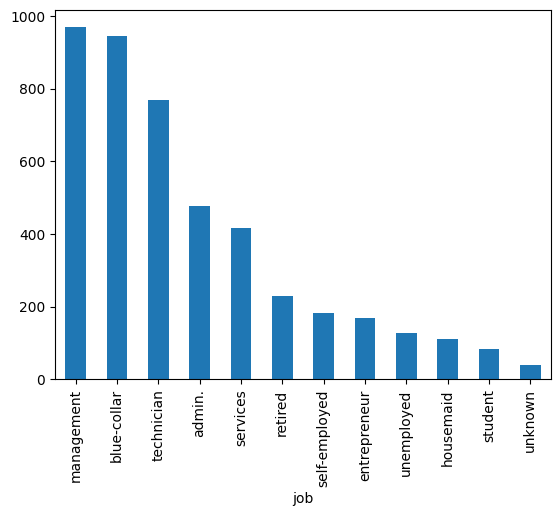

In [ ]:
#Bar chart
#job
data['job'].value_counts().plot(kind='bar')

We see here that lot of the person occupation are management based work .

<Axes: xlabel='marital'>

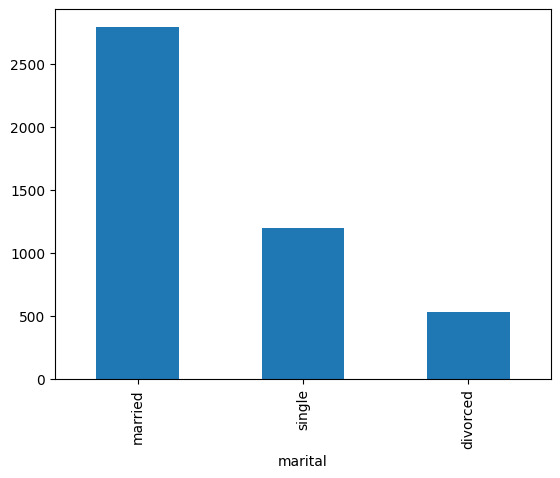

In [ ]:
#martial_status
data['marital'].value_counts().plot(kind='bar')

According to this visualization , more number of account holders  are married

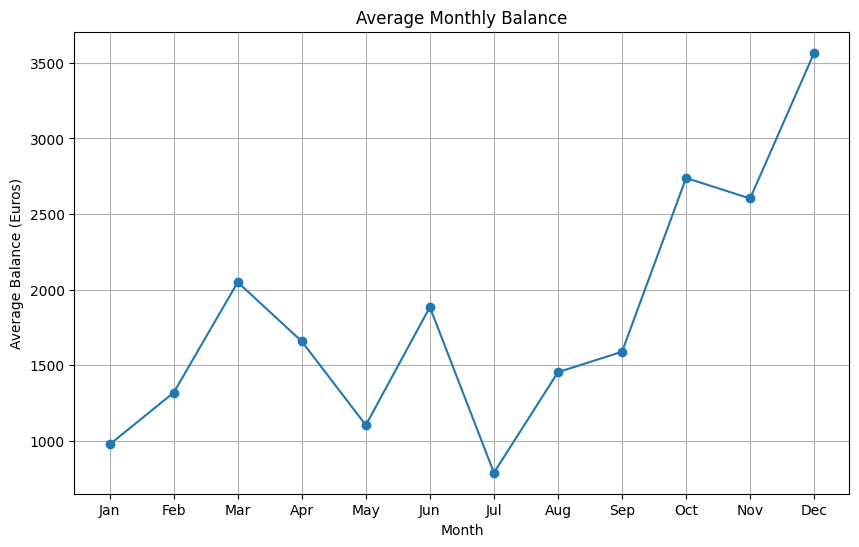

In [ ]:
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
data['month_num'] = data['month'].map(month_mapping)

# Group by the month number and calculate the average balance
monthly_avg_balance = data.groupby('month_num')['balance'].mean().sort_index()

# Plot the data using pandas
ax = monthly_avg_balance.plot(kind='line', marker='o', figsize=(10, 6), title='Average Monthly Balance')
ax.set_xlabel('Month')
ax.set_ylabel('Average Balance (Euros)')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


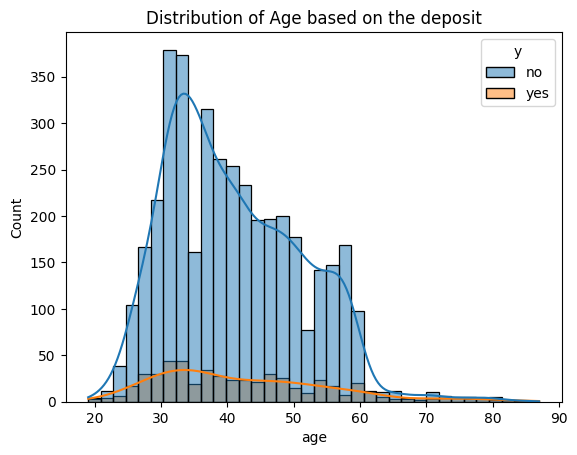

In [ ]:
sns.histplot(x='age',data=data,hue='y',kde='true')
plt.title("Distribution of Age based on the deposit")
plt.show()

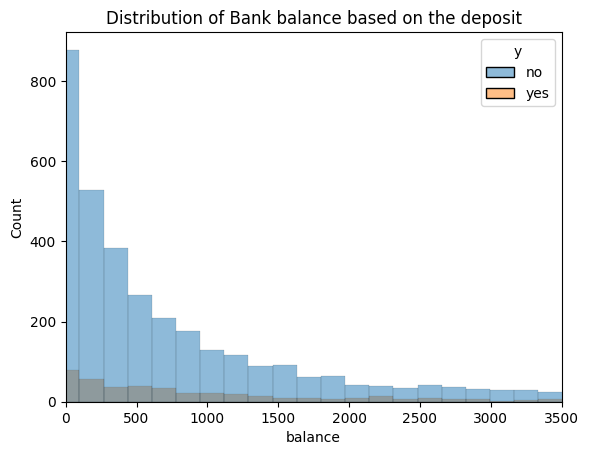

In [ ]:
#plt.figure(figsize=(15,4))
sns.histplot(x='balance',data=data,hue='y')
plt.xlim(0,3500)
plt.title("Distribution of Bank balance based on the deposit")
plt.show()

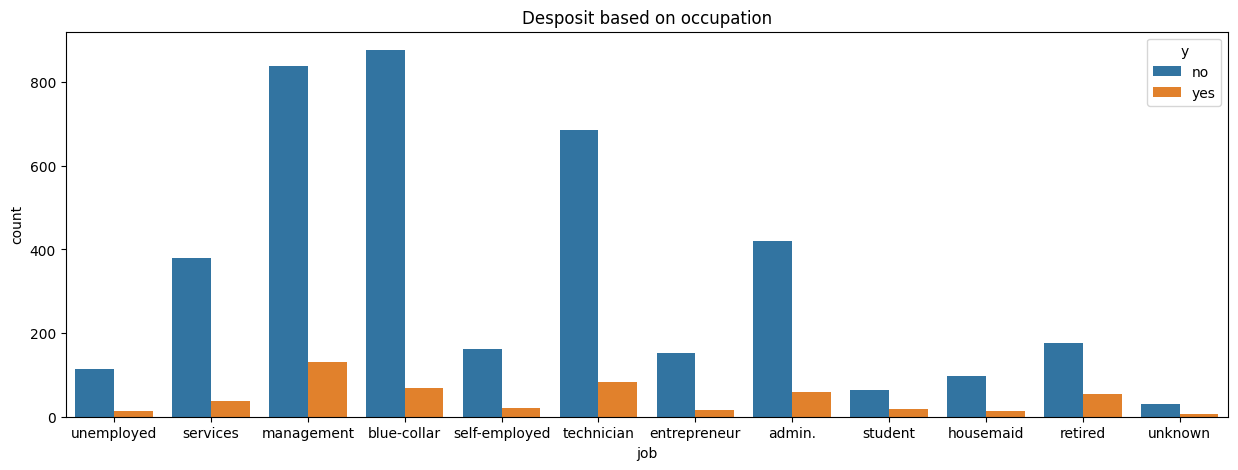

In [ ]:

plt.figure(figsize=(15,5))
sns.countplot(x='job',data=data,hue='y')
plt.title("Desposit based on occupation")
plt.show()


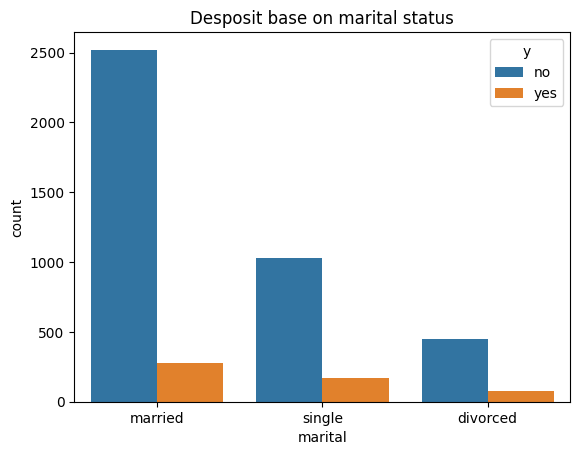

In [ ]:
sns.countplot(x='marital',data=data,hue='y')
plt.title("Desposit base on marital status")
plt.show()

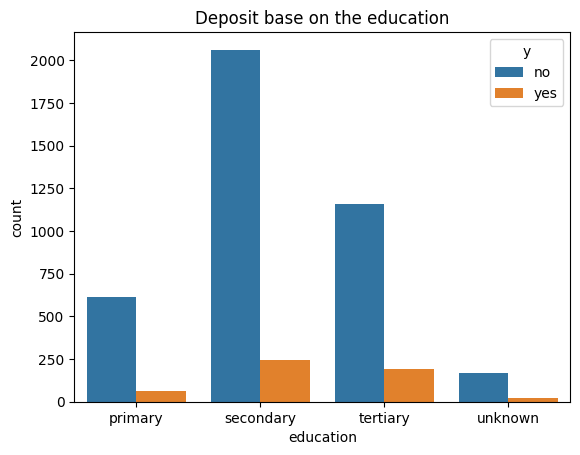

In [ ]:
sns.countplot(x='education',data=data, hue='y')
plt.title("Deposit base on the education")
plt.show()

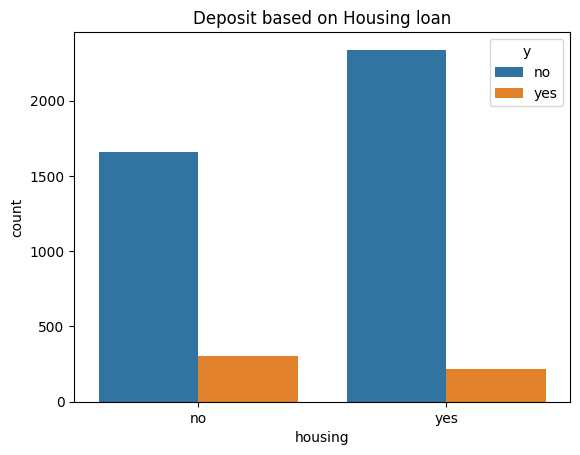

In [ ]:
sns.countplot(x='housing',data=data,hue='y')
plt.title("Deposit based on Housing loan")
plt.show()

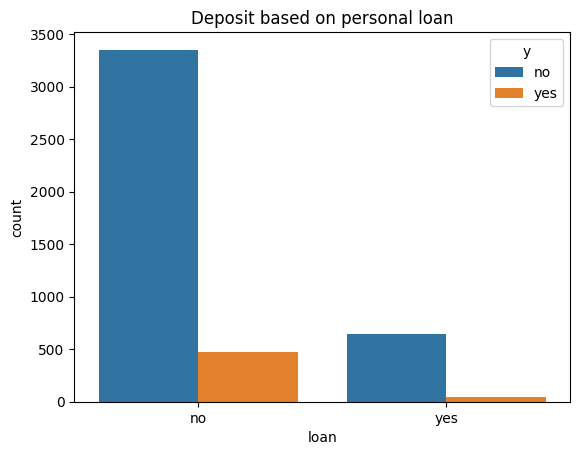

In [ ]:
sns.countplot(x='loan',data=data,hue='y')
plt.title("Deposit based on personal loan")
plt.show()

In [ ]:
#Drop the target variable from the feature
x=data.drop('y',axis=1)
y=data.y
x.head(3)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,month_num,job_encoded
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,10,10
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,5,7
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,4,4


In [ ]:
y.head(3)

0    no
1    no
2    no
Name: y, dtype: object

In [ ]:
label_encoder = LabelEncoder()

# Fit and transform the 'job' column
data['job_encoded'] = label_encoder.fit_transform(data['job'])
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,month_num,job_encoded
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,10,10
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,5,7
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,4,4


In [ ]:
# Identify categorical columns
categorical_cols = x.select_dtypes(include=['object']).columns
numeric_cols = x.select_dtypes(include=['int64', 'float64']).columns

# Create a ColumnTransformer to apply one-hot encoding to categorical features and scaling to numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

# Fit the model
pipeline.fit(train_X, train_y)

# Print the training and testing scores
print('Train Score: {}'.format(pipeline.score(train_X, train_y)))
print('Test Score: {}'.format(pipeline.score(test_X, test_y)))

Train Score: 1.0
Test Score: 0.8732498157700811


In [ ]:
# Perform cross-validation and print the mean score
cv_score = cross_val_score(pipeline, train_X, train_y, cv=5).mean()
print('Cross-Validation Score: {}'.format(cv_score))

Cross-Validation Score: 0.8672505849181114


In [ ]:
# Calculate and print the accuracy
accuracy = accuracy_score(test_y, ypred)
print("Test Accuracy of Decision Tree Classifier: {:.2f}%".format(accuracy * 100))

Test Accuracy of Decision Tree Classifier: 87.32%


In [ ]:
# Predict the labels for the test set
ypred = pipeline.predict(test_X)

# Print the classification report
print(classification_report(test_y, ypred))

              precision    recall  f1-score   support

          no       0.93      0.93      0.93      1205
         yes       0.44      0.46      0.45       152

    accuracy                           0.87      1357
   macro avg       0.68      0.69      0.69      1357
weighted avg       0.88      0.87      0.87      1357



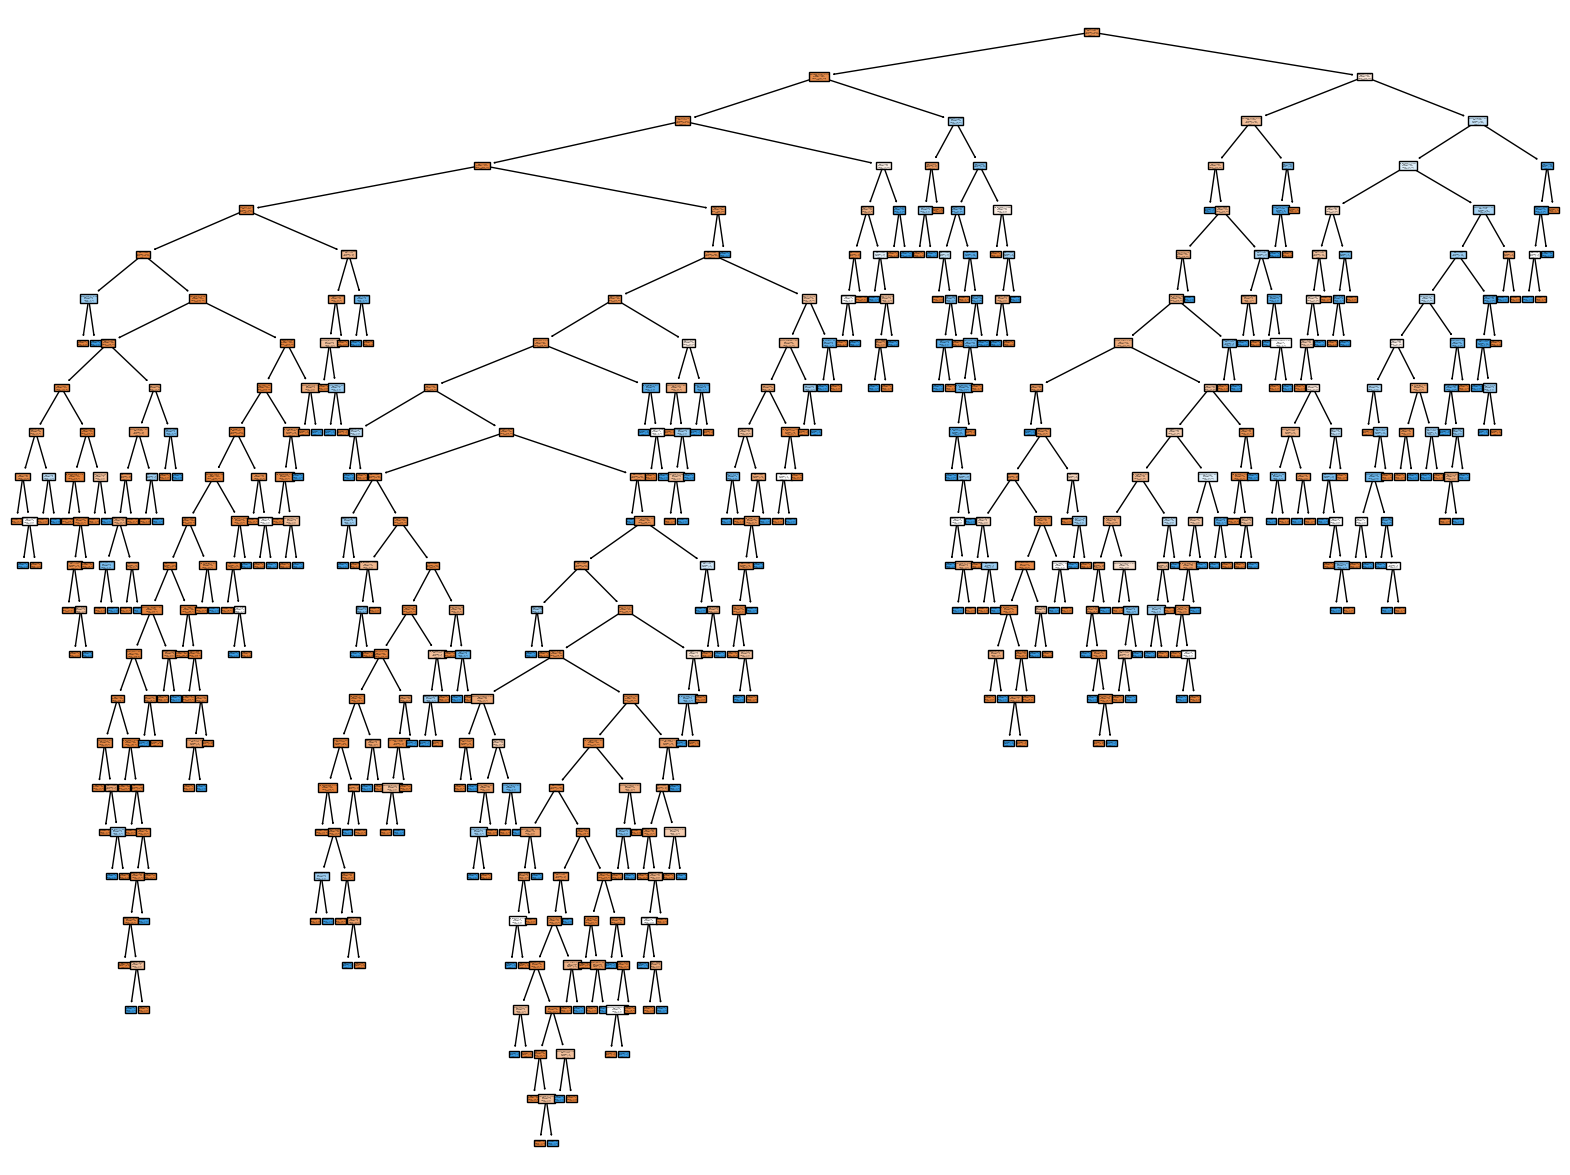

In [ ]:
# Extract the trained decision tree classifier from the pipeline
clf = pipeline.named_steps['classifier']
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
numeric_feature_names = list(numeric_cols)
feature_names = numeric_feature_names + list(ohe_feature_names)

plt.figure(figsize=(20, 15))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=['0', '1'])
plt.show()